In [1]:
#import sklearn.datasets.fetch_california_housing
import numpy as np
from sklearn import datasets
#import plotly as py

cal_hou = datasets.fetch_california_housing()

In [2]:
import pandas as pd
df = pd.DataFrame(data=cal_hou['data'], columns=cal_hou['feature_names']) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [3]:
aux = cal_hou['feature_names'].copy()
aux.remove('Latitude')
aux.remove('Longitude')
cal_hou['feature_names'] = aux
print(aux)
data_aux = cal_hou['data'].copy()
data_aux = np.delete(data_aux,6,1)
data_aux = np.delete(data_aux,6,1)
#data_aux

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


Eliminamos latitud y longitud.

In [4]:
df = pd.DataFrame(data=data_aux, columns=aux) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [5]:
import collections
import operator
print(df['MedInc'][87])
medinc = sorted(df['MedInc'].items(), key=lambda kv: kv[1])
l = len(medinc)
print(l)
for x in range(0,l):
    a,b = medinc[x]
    medinc[x] = (x,b)
#print(medinc)
medincmap = dict(medinc)
#medincmap.values().head()

0.76
20640


In [6]:
df2 = df.copy()
df2['MedIncOrd'] = sorted(df['MedInc'].values)

In [7]:
# Definición de una función
def clasificarDF2(x):
    if x < 3:
        return 'baja'
    elif x < 7:
        return 'media'
    else:
        return 'alta'

In [8]:
from pandas.plotting import scatter_matrix

dic_colors = { 'baja': 'red', 'media': 'orange', 'alta': 'green' }
colors = df2['MedIncOrd'].map(clasificarDF2).map(dic_colors)

In [9]:
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197110AEE10>,
      dtype=object)

In [10]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
df_values_normal = scaler.fit_transform(df.values)
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.004889,0.037450,0.007642,0.001568,0.996317,0.003642
std,0.010754,0.063291,0.024530,0.005466,0.032200,0.007830
min,0.000072,0.000184,0.000148,0.000028,0.151008,0.000164
25%,0.001760,0.012447,0.002837,0.000610,0.999037,0.001653
50%,0.003000,0.023976,0.004438,0.000903,0.999684,0.002442
75%,0.005021,0.042432,0.006918,0.001343,0.999906,0.003571
max,0.406675,0.981552,0.939911,0.233944,1.000000,0.413359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001971667CA58>,
      dtype=object)

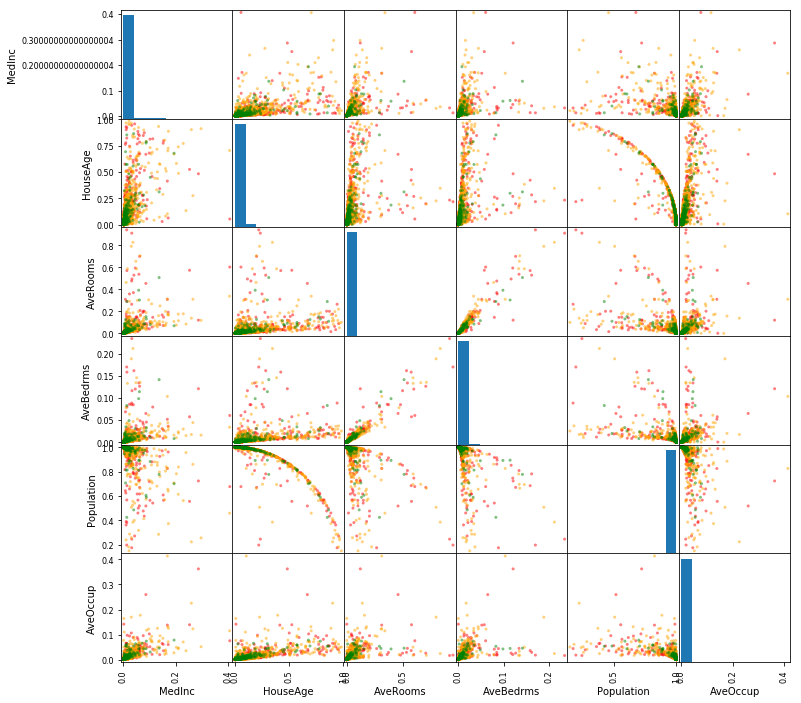

In [11]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019717D73CC0>,
      dtype=object)

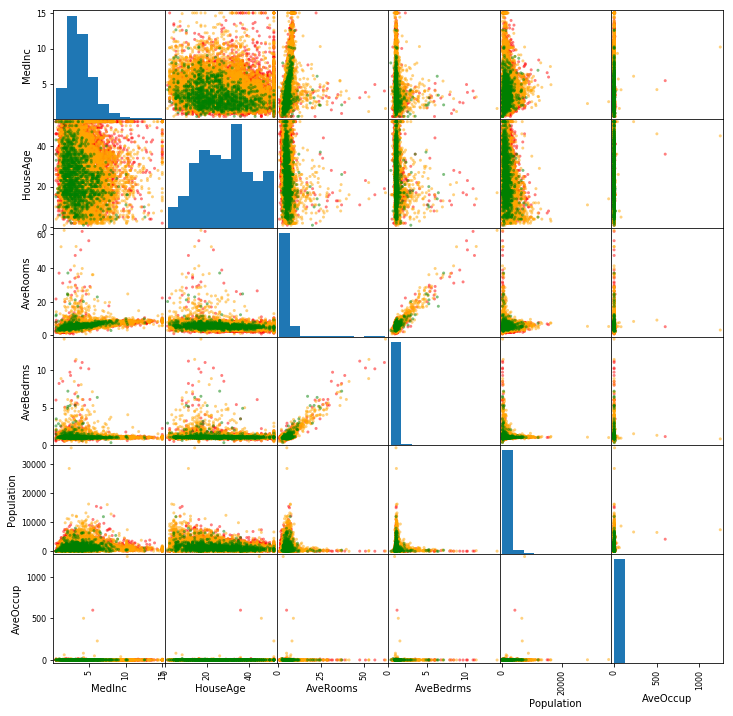

In [12]:
df2=df.loc[df.AveBedrms<15]
len(df2)
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)

In [13]:
#Como la edad de la csa y la poblacion están correlacionados, consideramos que podemos prescindir de un de estos dos datos
data_aux2 = np.delete(data_aux,2,1)
aux.remove('AveBedrms')
df_def = pd.DataFrame(data=data_aux2, columns=aux) 
df_def.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.096675,1425.476744,3.070655
std,1.899822,12.585558,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.333333,3.000000,0.692308
25%,2.563400,18.000000,1.006079,787.000000,2.429741
50%,3.534800,29.000000,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,1.099526,1725.000000,3.282261
max,15.000100,52.000000,34.066667,35682.000000,1243.333333


In [14]:
# Estandarizamos los datos para que estén centrados en 0 y con varianza 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_values_std = scaler.fit_transform(df_def.values)
df_std = pd.DataFrame(data=df_values_std, columns=cal_hou['feature_names']) 
df_std.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,5.878911e-16,5.519526e-15,-7.506747e-17,-7.361326e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-8.453931e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,2.864572e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,6.643103e-01,6.015869e-03,2.644949e-01,2.037453e-02
max,5.858286e+00,1.856182e+00,6.957171e+01,3.025033e+01,1.194191e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001971EDFE898>,
      dtype=object)

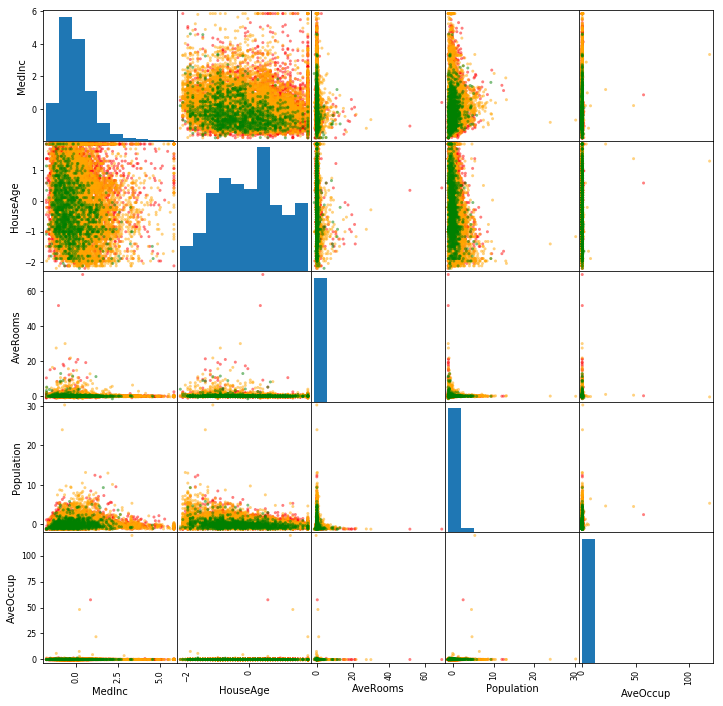

In [15]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import numpy as np


#plot_clusters(df_normal, labels, centers)

In [ ]:
K_MAX = 8
silueta = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km1 = KMeans(init='random', n_clusters=k)
    km1.fit(df_normal)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta[k-2] = silhouette_score(df_normal, km1.labels_) 
plt.plot(range(2, K_MAX), silueta)
plt.title('Valor de silueta para diferentes k')

In [ ]:
K_MAX = 8
silueta2 = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km2 = KMeans(init='random', n_clusters=k)
    km2.fit(df_std)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta2[k-2] = silhouette_score(df_std, km2.labels_) 
plt.plot(range(2, K_MAX), silueta2)
plt.title('Valor de silueta para diferentes k')

In [ ]:
km_normal = KMeans(init='random', n_clusters=2)

# Agrupar los puntos en clusters
km_normal.fit(df_normal)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_normal = km_normal.labels_
centers_normal = km_normal.cluster_centers_

In [ ]:
km_std = KMeans(init='random', n_clusters=4)

# Agrupar los puntos en clusters
km_std.fit(df_std)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_std = km_std.labels_
centers_std = km_std.cluster_centers_

In [ ]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'yellow', 3 : 'green', 4: 'orange', 5:'purple', 6:'black'}
df_normal['grupo']=labels_normal
colors_normal=df_normal['grupo'].map(dic_colors)
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors_normal)